In [75]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.datasets import load_boston, make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [76]:
boston = load_boston()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

c:\Users\user\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [77]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [78]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [79]:
len(y)

506

### 스케일링

In [80]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x) # 학습과 변환이 동시에!
x_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [81]:
# train, test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, random_state = 77)

### 선형

In [82]:
svr = SVR(kernel="linear", C=1.0, gamma='auto')
svr.fit(x_train,y_train)

SVR(gamma='auto', kernel='linear')

In [83]:
pred = svr.predict(x_test)

In [84]:
print("가중치: ", svr.coef_)
print('절편값: ', svr.intercept_)

가중치:  [[ -1.79797213   3.61430079  -1.17434681   3.          -2.10113472
   11.718615    -2.41902698  -6.08907034   1.21217291  -3.77457494
   -6.79415921   3.080901   -11.45037487]]
절편값:  [24.94443187]


In [85]:
#MSE 구하기
print('평균 잔차 제곱', np.mean(np.square(y_test-pred)))

평균 잔차 제곱 23.54274398812734


In [86]:
mse = mean_squared_error(y_test, pred)
print('MSE: ', mse)

MSE:  23.54274398812734


In [87]:
rmse = mean_squared_error(y_test,pred)**0.5
print('rmse: ', rmse )

rmse:  4.852086560246771


In [88]:
rmse = mean_squared_error(y_test, pred, squared=False) # squared= True : mse, False = rmse
print('rmse: ', rmse )

rmse:  4.852086560246771


In [89]:
svr.score(x_test, y_test) #r2값

0.6871743303048946

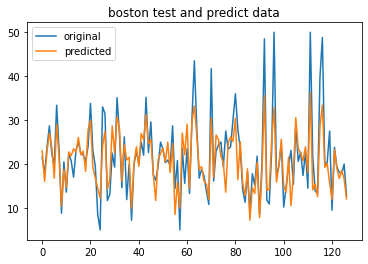

In [90]:
# 시각화
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.title('boston test and predict data')
plt.legend()
plt.show()

### 다항식

In [91]:
svr = SVR(kernel='poly', C = 1.0 , gamma= 'auto')
svr.fit(x_train, y_train)

SVR(gamma='auto', kernel='poly')

In [92]:
pred = svr.predict(x_test)

In [93]:
mse = mean_squared_error(y_test, pred)
print('MSE: ', mse)

MSE:  64.02128765432134


In [94]:
rmse = mean_squared_error(y_test, pred, squared=False) # squared= True : mse, False = rmse
print('rmse: ', rmse )

rmse:  8.001330367777681


In [95]:
svr.score(x_test, y_test) #r2값

0.14931317286948498

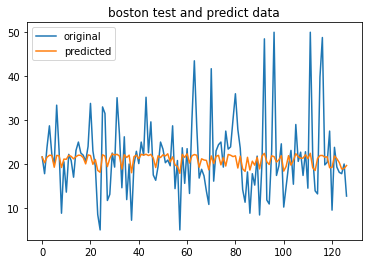

In [96]:
# 시각화
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.title('boston test and predict data')
plt.legend()
plt.show()

### 가우시안

In [97]:
svr = SVR(kernel='rbf', C=1.0, gamma='auto')
svr.fit(x_train, y_train)

SVR(gamma='auto')

In [98]:
pred = svr.predict(x_test)

In [99]:
mse = mean_squared_error(y_test, pred)
print('MSE: ', mse)

MSE:  42.95223764307436


In [100]:
rmse = mean_squared_error(y_test, pred, squared=False) # squared= True : mse, False = rmse
print('rmse: ', rmse )

rmse:  6.553795666869266


In [101]:
svr.score(x_test, y_test) #r2값

0.4292694805510291

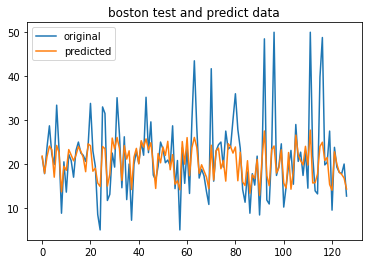

In [102]:
# 시각화
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.title('boston test and predict data')
plt.legend()
plt.show()

In [104]:
# 최적의 값 찾기
kernel_list = ['linear','poly','rbf']

for kernel in kernel_list:
    svr = SVR(kernel=kernel, C=10, gamma='auto')
    svr.fit(x_train, y_train)

    pred = svr.predict(x_test)
    
    print('커널: ', kernel)
    print('절편: ', svr.intercept_)
    print('mse: ', mean_squared_error(y_test ,pred))
    print('rmse: ', mean_squared_error(y_test , pred)**0.5)
    print('R2: ', svr.score(x_test, y_test))
    

커널:  linear
절편:  [20.21852236]
mse:  19.605078264197672
rmse:  4.427762218570197
R2:  0.7394963076302634
커널:  poly
절편:  [23.52662449]
mse:  45.326873143218826
rmse:  6.732523534546227
R2:  0.39771636418578804
커널:  rbf
절편:  [27.43398977]
mse:  20.70064609071835
rmse:  4.549796269144186
R2:  0.7249388822426119


In [105]:
svr = SVR(kernel='rbf', C=10, gamma="auto")
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print('mse: ', mean_squared_error(y_test ,pred))
print('rmse: ', mean_squared_error(y_test , pred)**0.5)

mse:  20.70064609071835
rmse:  4.549796269144186


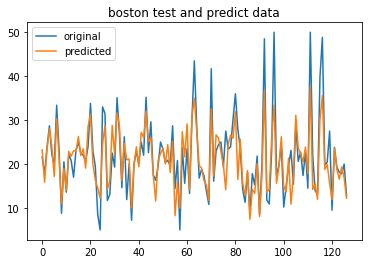

In [106]:
# 시각화
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.title('boston test and predict data')
plt.legend()
plt.show()